In [1]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import matplotlib.pyplot as plt
import time
from orbithunter.gluing import tile_dictionary_ks


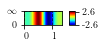

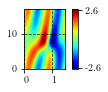

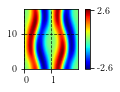

In [3]:
from orbithunter.gluing import tile_dictionary_ks
td = tile_dictionary_ks(comoving=False)

td[0].plot()

td[1].plot()

td[2].plot()

In [3]:
tile_dictionary = rediscretize_tiling_dictionary(td, new_shape=(16,16))

In [4]:
glue_shape = (3, 3)
symbol_arrays = generate_symbol_arrays(tile_dictionary, glue_shape=glue_shape, unique=True)

In [5]:
tiling_example = tile(symbol_arrays[0], tile_dictionary, OrbitKS)

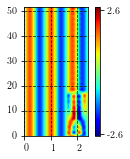

In [6]:
tiling_example.plot()

In [7]:
from collections import Counter

In [8]:
symbol_arrays = generate_symbol_arrays(td, glue_shape, unique=True)


In [9]:
X = []
symbol_y = []
converge_y = []
for sa in symbol_arrays:
    tiling = rediscretize(tile(sa, td, OrbitKS), new_shape=(32, 32))
    X.append(tiling.state)
    symbol_counter = Counter(sa.ravel().tolist())
    symbol_y.append([symbol_counter[0]/sa.size, symbol_counter[1]/sa.size, symbol_counter[2]/sa.size])
X = np.array(X)
X = np.reshape(X, (*X.shape, 1))
y = np.array(symbol_y)

In [10]:
X.shape, y.shape

((2176, 32, 32, 1), (2176, 3))

If we use a softmax layer, the output can be interpreted as a probability, which means that the total is conserved, such that if we multiply by the number of symbols we can get back an estimate that conserves the number of tiles.  

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, Activation
from sklearn.model_selection import train_test_split

X = (X - X.mean()) / X.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sample_size = X.shape[0]

cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=8, padding='valid', input_shape=X.shape[1:]
               ))
cnn.add(AveragePooling2D(pool_size=2))
cnn.add(Activation('relu'))

cnn.add(Conv2D(filters=8, kernel_size=8,
               padding='valid'
               ))
cnn.add(AveragePooling2D(pool_size=2))
cnn.add(Activation('relu'))
cnn.add(Flatten())
cnn.add(Dense(int(X[0].size)))
cnn.add(Dense(y.shape[1], activation='softmax'))
cnn.compile(loss='mse', optimizer='adam')

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        2080      
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 8)           16392     
_________________________________________________________________
average_pooling2d_1 (Average (None, 2, 2, 8)           0         
_________________________________________________________________
activation_1 (Activation)    (None, 2, 2, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0

In [13]:
history = cnn.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, epochs=100)

Train on 1740 samples, validate on 436 samples
Epoch 1/100
1740/1740 [==============================] - 1s 785us/sample - loss: 0.0101 - val_loss: 0.0032
Epoch 2/100
1740/1740 [==============================] - 1s 664us/sample - loss: 0.0021 - val_loss: 0.0011
Epoch 3/100
1740/1740 [==============================] - 1s 649us/sample - loss: 8.3284e-04 - val_loss: 7.4446e-04
Epoch 4/100
1740/1740 [==============================] - 1s 657us/sample - loss: 8.1070e-04 - val_loss: 0.0011
Epoch 5/100
1740/1740 [==============================] - 1s 647us/sample - loss: 7.1485e-04 - val_loss: 9.0856e-04
Epoch 6/100
1740/1740 [==============================] - 1s 649us/sample - loss: 6.4712e-04 - val_loss: 5.9696e-04
Epoch 7/100
1740/1740 [==============================] - 1s 663us/sample - loss: 5.4713e-04 - val_loss: 5.2995e-04
Epoch 8/100
1740/1740 [==============================] - 1s 645us/sample - loss: 5.4954e-04 - val_loss: 5.8532e-04
Epoch 9/100
1740/1740 [==============================

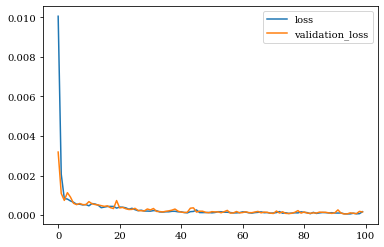

In [26]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False

_ = plt.plot(history.history['loss'])
_ = plt.plot(history.history['val_loss'])
_ = plt.legend(('loss', 'validation_loss'))
_ = plt.show()

In [27]:
example_orbit_ = read_h5('OrbitKS_L37p297_T79p783.h5', directory='../data/test_data/')

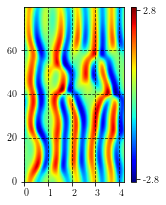

In [28]:
example_orbit_.plot()

In [29]:
example_orbit_ = rediscretize(example_orbit_, new_shape=(32,32))

In [30]:
print('Example L:', example_orbit_.L, 'Sum_L for Tiles', td[0].L + td[1].L + td[2].L)

Example L: 37.29708818660391 Sum_L for Tiles 37.000844133611395


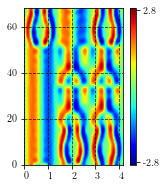

In [31]:
guess_symbol_array = np.array([[2,0,2],[0,1,1],[0,1,1],[0,2,2]])
approximate_tiling = rediscretize(tile(guess_symbol_array, td, OrbitKS), new_shape=(32, 32))
approximate_tiling.plot()

In [32]:
np.matrix(guess_symbol_array)

matrix([[2, 0, 2],
        [0, 1, 1],
        [0, 1, 1],
        [0, 2, 2]])

In [22]:
test_converge_result = converge(approximate_tiling, verbose=True, method='hybrid')
test_tiling = test_converge_result.orbit

Starting gradient descent. Initial residual=1270.3255741809826, target=1.024e-06, max_iter=16384
#################################################
 Residual=0.39656636284102503 after 5000 gradient descent iterations. Current parameter values:(68.60697595062322, 37.000892167255344, 0)
#################################################
 Residual=0.13826463519550064 after 10000 gradient descent iterations. Current parameter values:(68.61013367738286, 37.00089409031919, 0)
#################################################
 Residual=0.09407771478207265 after 15000 gradient descent iterations. Current parameter values:(68.61125203139447, 37.00089510327911, 0)
#############Starting lstsq. Initial residual=0.08827812270001564, target=1.024e-06
57777888888
Failed to converge. Exiting with residual 0.08348663039021052


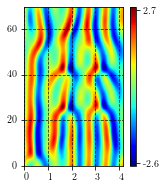

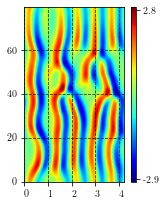

(None, None)

In [33]:
test_tiling.rotate(-0.25, axis=1).plot(), example_orbit_.plot()

In [36]:
prediction_for_target = cnn.predict(example_orbit_.convert(to='field').state.reshape(1, 32, 32, 1))

In [38]:
prediction_for_target * sa.size

array([[1.4002764, 3.8111675, 3.7885563]], dtype=float32)

In [ ]:
y_bottleneck = []
for sa in symbol_arrays:
    tiling = rediscretize(tile(sa, td, OrbitKS), new_shape=(32, 32))
    y_bottleneck.append(gudhi_distance(tiling, example_orbit_, metric='bottleneck'))
y = np.array(y_bottleneck).reshape(-1,1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, Activation
from sklearn.model_selection import train_test_split

X = (X - X.mean()) / X.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sample_size = X.shape[0]

bottleneck_cnn = Sequential()
bottleneck_cnn.add(Conv2D(filters=32, kernel_size=8, padding='valid', input_shape=X.shape[1:]
               ))
bottleneck_cnn.add(AveragePooling2D(pool_size=2))
bottleneck_cnn.add(Activation('relu'))

bottleneck_cnn.add(Conv2D(filters=8, kernel_size=8,
               padding='valid'
               ))
bottleneck_cnn.add(AveragePooling2D(pool_size=2))
bottleneck_cnn.add(Activation('relu'))
bottleneck_cnn.add(Flatten())
bottleneck_cnn.add(Dense(int(sample_size)))
bottleneck_cnn.add(Dense(y.shape[1], activation='relu'))
bottleneck_cnn.compile(loss='mse', optimizer='adam')
bottleneck_cnn.summary()

In [ ]:
history = bottleneck_cnn.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, epochs=100)

As a baseline, let's see how well it predicts the distance between the example orbit and itself: The expected value is of course, 0.

In [ ]:
gudhi_distance(example_orbit_, example_orbit_, metric='bottleneck')

In [ ]:
bottleneck_cnn.predict(example_orbit_.convert(to='field').state.reshape(1, 32, 32, 1))

In [ ]:
bottleneck_cnn.predict(test_tiling.convert(to='field').state.reshape(1, 32, 32, 1))

In [ ]:
y_predict = bottleneck_cnn.predict(X_test)

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
_ = ax.scatter(y_test, y_predict, s=5)
_ = ax.plot([0,y_test.max()],[0,y_test.max()], color='r')
_ = plt.xlabel('True value')
_ = plt.ylabel('Predicted value')
_ = plt.show()

In [ ]:
X, y = list_of_orbits, list_of_predictive_quantities
orbit_cnn(X, y)